In [1]:
import pandas as pd

In [2]:
all_data = pd.read_csv("./data/house/all_transformed.csv")

In [3]:
ntrain = 1460

train = all_data[:ntrain]
test = all_data[ntrain:]

In [4]:
y_train = pd.read_csv("./data/house/train.csv")['SalePrice']
y_train = np.log(y_train)

In [5]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
# import xgboost as xgb
import lightgbm as lgb

In [6]:
std_x = StandardScaler()
std_x.fit(train.values)
x_scaled = std_x.transform(train.values)


In [9]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [213]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.exp(lr.predict(std_x.transform(test.values)))
sub.to_csv('submission.csv',index=False)

# Use NN

In [11]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import initializers
from keras import optimizers

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [56]:
?optimizers.Adagrad

In [66]:
from keras.layers.normalization import BatchNormalization

input_x = Input(shape=(x_scaled.shape[1],))


h1 = Dense(512,activation='relu',
               kernel_regularizer=regularizers.l1(0.005),)(input_x)
n1 = BatchNormalization()(h1)


h2 = Dense(64,activation='relu',
               kernel_regularizer=regularizers.l1(0.005),)(n1)
n2 = BatchNormalization()(h2)


output = Dense(1,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(n2)

model = Model(input_x,output)
model.compile(optimizer=optimizers.Adagrad(lr=0.05),
              loss='mean_squared_error',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 223)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               114688    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_55 (Dense)             (None, 64)                32832     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 65        
Total params: 149,889
Trainable params: 148,737
Non-trainable params: 1,152
_________________________________________________________________


In [67]:
error = model.fit(x_scaled,y_train,
                  batch_size=8,validation_split=0.1,
                  validation_steps=None,epochs=2000,verbose=1)

Train on 1314 samples, validate on 146 samples
Epoch 1/2000
1314/1314 [==============================] - 1s 993us/step - loss: 32.4300 - val_loss: 17.4491
Epoch 2/2000
1314/1314 [==============================] - 0s 333us/step - loss: 13.0284 - val_loss: 13.6218
Epoch 3/2000
1314/1314 [==============================] - 0s 319us/step - loss: 9.9133 - val_loss: 18.9464
Epoch 4/2000
1314/1314 [==============================] - 0s 324us/step - loss: 10.4011 - val_loss: 6.8345
Epoch 5/2000
1314/1314 [==============================] - 0s 335us/step - loss: 7.2203 - val_loss: 8.9166
Epoch 6/2000
1314/1314 [==============================] - 0s 330us/step - loss: 7.2801 - val_loss: 6.2197
Epoch 7/2000
1314/1314 [==============================] - 0s 341us/step - loss: 5.7912 - val_loss: 5.0510
Epoch 8/2000
1314/1314 [==============================] - 0s 339us/step - loss: 4.2467 - val_loss: 4.1541
Epoch 9/2000
1314/1314 [==============================] - 0s 331us/step - loss: 5.7811 - val_loss: 

1314/1314 [==============================] - 0s 321us/step - loss: 0.4229 - val_loss: 0.8785
Epoch 78/2000
1314/1314 [==============================] - 0s 322us/step - loss: 0.4797 - val_loss: 0.4054
Epoch 79/2000
1314/1314 [==============================] - 0s 322us/step - loss: 0.4157 - val_loss: 0.4108
Epoch 80/2000
1314/1314 [==============================] - 0s 323us/step - loss: 0.4030 - val_loss: 0.5108
Epoch 81/2000
1314/1314 [==============================] - 0s 321us/step - loss: 0.4618 - val_loss: 0.5807
Epoch 82/2000
1314/1314 [==============================] - 0s 325us/step - loss: 0.4319 - val_loss: 1.1707
Epoch 83/2000
1314/1314 [==============================] - 0s 338us/step - loss: 0.5113 - val_loss: 1.1108
Epoch 84/2000
1314/1314 [==============================] - 0s 336us/step - loss: 0.5403 - val_loss: 0.7315
Epoch 85/2000
1314/1314 [==============================] - 0s 324us/step - loss: 0.5024 - val_loss: 0.4779
Epoch 86/2000
1314/1314 [==========================

1314/1314 [==============================] - 0s 315us/step - loss: 0.2460 - val_loss: 0.3190
Epoch 154/2000
1314/1314 [==============================] - 0s 310us/step - loss: 0.2549 - val_loss: 0.2381
Epoch 155/2000
1314/1314 [==============================] - 0s 316us/step - loss: 0.2443 - val_loss: 0.2295
Epoch 156/2000
1314/1314 [==============================] - 0s 311us/step - loss: 0.2435 - val_loss: 0.2777
Epoch 157/2000
1314/1314 [==============================] - 0s 316us/step - loss: 0.2422 - val_loss: 0.2464
Epoch 158/2000
1314/1314 [==============================] - 0s 320us/step - loss: 0.2423 - val_loss: 0.2621
Epoch 159/2000
1314/1314 [==============================] - 0s 316us/step - loss: 0.2368 - val_loss: 0.2262
Epoch 160/2000
1314/1314 [==============================] - 0s 316us/step - loss: 0.2427 - val_loss: 0.2417
Epoch 161/2000
1314/1314 [==============================] - 0s 314us/step - loss: 0.2404 - val_loss: 0.2450
Epoch 162/2000
1314/1314 [=================

Epoch 229/2000
1314/1314 [==============================] - 0s 375us/step - loss: 0.1965 - val_loss: 0.1775
Epoch 230/2000
1314/1314 [==============================] - 0s 316us/step - loss: 0.1961 - val_loss: 0.1866
Epoch 231/2000
1314/1314 [==============================] - 0s 303us/step - loss: 0.1951 - val_loss: 0.1786
Epoch 232/2000
1314/1314 [==============================] - 0s 379us/step - loss: 0.1935 - val_loss: 0.2216
Epoch 233/2000
1314/1314 [==============================] - 1s 385us/step - loss: 0.1956 - val_loss: 0.2704
Epoch 234/2000
1314/1314 [==============================] - 0s 333us/step - loss: 0.2086 - val_loss: 0.2070
Epoch 235/2000
1314/1314 [==============================] - 0s 309us/step - loss: 0.1973 - val_loss: 0.2302
Epoch 236/2000
1314/1314 [==============================] - 0s 307us/step - loss: 0.1930 - val_loss: 0.1970
Epoch 237/2000
1314/1314 [==============================] - 0s 307us/step - loss: 0.1999 - val_loss: 0.1868
Epoch 238/2000
1314/1314 [==

1314/1314 [==============================] - 0s 300us/step - loss: 0.1747 - val_loss: 0.2803
Epoch 305/2000
1314/1314 [==============================] - 0s 300us/step - loss: 0.1749 - val_loss: 0.1622
Epoch 306/2000
1314/1314 [==============================] - 0s 303us/step - loss: 0.1731 - val_loss: 0.1664
Epoch 307/2000
1314/1314 [==============================] - 0s 301us/step - loss: 0.1653 - val_loss: 0.1657
Epoch 308/2000
1314/1314 [==============================] - 0s 312us/step - loss: 0.1697 - val_loss: 0.1547
Epoch 309/2000
1314/1314 [==============================] - 0s 341us/step - loss: 0.1693 - val_loss: 0.1495
Epoch 310/2000
1314/1314 [==============================] - 0s 301us/step - loss: 0.1685 - val_loss: 0.1552
Epoch 311/2000
1314/1314 [==============================] - 0s 298us/step - loss: 0.1693 - val_loss: 0.1613
Epoch 312/2000
1314/1314 [==============================] - 0s 300us/step - loss: 0.1688 - val_loss: 0.1520
Epoch 313/2000
1314/1314 [=================

Epoch 380/2000
1314/1314 [==============================] - 0s 298us/step - loss: 0.1556 - val_loss: 0.2112
Epoch 381/2000
1314/1314 [==============================] - 0s 301us/step - loss: 0.1508 - val_loss: 0.1628
Epoch 382/2000
1314/1314 [==============================] - 0s 299us/step - loss: 0.1537 - val_loss: 0.1384
Epoch 383/2000
1314/1314 [==============================] - 0s 300us/step - loss: 0.1547 - val_loss: 0.1588
Epoch 384/2000
1314/1314 [==============================] - 0s 299us/step - loss: 0.1499 - val_loss: 0.1375
Epoch 385/2000
1314/1314 [==============================] - 0s 300us/step - loss: 0.1506 - val_loss: 0.1601
Epoch 386/2000
1314/1314 [==============================] - 0s 300us/step - loss: 0.1557 - val_loss: 0.1452
Epoch 387/2000
1314/1314 [==============================] - 0s 299us/step - loss: 0.1545 - val_loss: 0.1704
Epoch 388/2000
1314/1314 [==============================] - 0s 302us/step - loss: 0.1582 - val_loss: 0.1380
Epoch 389/2000
1314/1314 [==

Epoch 456/2000
1314/1314 [==============================] - 0s 305us/step - loss: 0.1447 - val_loss: 0.1720
Epoch 457/2000
1314/1314 [==============================] - 0s 306us/step - loss: 0.1474 - val_loss: 0.2496
Epoch 458/2000
1314/1314 [==============================] - 0s 304us/step - loss: 0.1464 - val_loss: 0.1511
Epoch 459/2000
1314/1314 [==============================] - 0s 306us/step - loss: 0.1529 - val_loss: 0.1327
Epoch 460/2000
1314/1314 [==============================] - 0s 304us/step - loss: 0.1462 - val_loss: 0.1397
Epoch 461/2000
1314/1314 [==============================] - 0s 303us/step - loss: 0.1503 - val_loss: 0.1508
Epoch 462/2000
1314/1314 [==============================] - 0s 305us/step - loss: 0.1512 - val_loss: 0.1362
Epoch 463/2000
1314/1314 [==============================] - 0s 304us/step - loss: 0.1472 - val_loss: 0.1377
Epoch 464/2000
1314/1314 [==============================] - 0s 307us/step - loss: 0.1450 - val_loss: 0.1384
Epoch 465/2000
1314/1314 [==

Epoch 532/2000
1314/1314 [==============================] - 0s 301us/step - loss: 0.1471 - val_loss: 0.1350
Epoch 533/2000
1314/1314 [==============================] - 0s 299us/step - loss: 0.1469 - val_loss: 0.1308
Epoch 534/2000
1314/1314 [==============================] - 0s 331us/step - loss: 0.1452 - val_loss: 0.1321
Epoch 535/2000
1314/1314 [==============================] - 0s 342us/step - loss: 0.1417 - val_loss: 0.1349
Epoch 536/2000
1314/1314 [==============================] - 0s 308us/step - loss: 0.1414 - val_loss: 0.1438
Epoch 537/2000
1314/1314 [==============================] - 0s 301us/step - loss: 0.1403 - val_loss: 0.1290
Epoch 538/2000
1314/1314 [==============================] - 0s 302us/step - loss: 0.1369 - val_loss: 0.1307
Epoch 539/2000
1314/1314 [==============================] - 0s 296us/step - loss: 0.1393 - val_loss: 0.1342
Epoch 540/2000
1314/1314 [==============================] - 0s 304us/step - loss: 0.1376 - val_loss: 0.1358
Epoch 541/2000
1314/1314 [==

Epoch 608/2000
1314/1314 [==============================] - 0s 322us/step - loss: 0.1286 - val_loss: 0.1219
Epoch 609/2000
1314/1314 [==============================] - 0s 315us/step - loss: 0.1333 - val_loss: 0.1226
Epoch 610/2000
1314/1314 [==============================] - 0s 336us/step - loss: 0.1340 - val_loss: 0.1201
Epoch 611/2000
1314/1314 [==============================] - 0s 344us/step - loss: 0.1326 - val_loss: 0.1191
Epoch 612/2000
1314/1314 [==============================] - 0s 329us/step - loss: 0.1332 - val_loss: 0.1268
Epoch 613/2000
1314/1314 [==============================] - 0s 325us/step - loss: 0.1311 - val_loss: 0.1238
Epoch 614/2000
1314/1314 [==============================] - 0s 332us/step - loss: 0.1337 - val_loss: 0.1290
Epoch 615/2000
1314/1314 [==============================] - 0s 330us/step - loss: 0.1359 - val_loss: 0.1278
Epoch 616/2000
1314/1314 [==============================] - 0s 324us/step - loss: 0.1307 - val_loss: 0.1299
Epoch 617/2000
1314/1314 [==

Epoch 684/2000
1314/1314 [==============================] - 1s 533us/step - loss: 0.1291 - val_loss: 0.1141
Epoch 685/2000
1314/1314 [==============================] - 1s 488us/step - loss: 0.1265 - val_loss: 0.1242
Epoch 686/2000
1314/1314 [==============================] - 1s 648us/step - loss: 0.1274 - val_loss: 0.1147
Epoch 687/2000
1314/1314 [==============================] - 1s 630us/step - loss: 0.1274 - val_loss: 0.1138
Epoch 688/2000
1314/1314 [==============================] - 1s 457us/step - loss: 0.1327 - val_loss: 0.1193
Epoch 689/2000
1314/1314 [==============================] - 0s 375us/step - loss: 0.1253 - val_loss: 0.1147
Epoch 690/2000
1314/1314 [==============================] - 1s 386us/step - loss: 0.1272 - val_loss: 0.1152
Epoch 691/2000
1314/1314 [==============================] - 0s 378us/step - loss: 0.1251 - val_loss: 0.1212
Epoch 692/2000
1314/1314 [==============================] - 0s 360us/step - loss: 0.1269 - val_loss: 0.1184
Epoch 693/2000
1314/1314 [==

KeyboardInterrupt: 

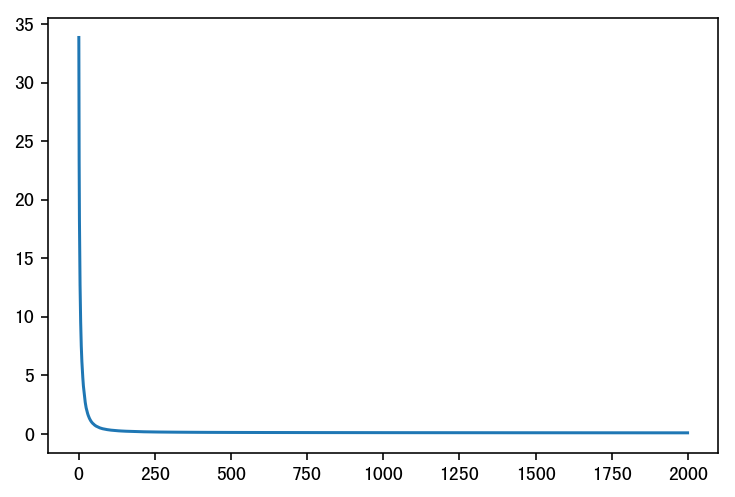

In [68]:
plt.plot(error.history['loss'])


In [69]:
y_predict = model.predict(x_scaled)
metrics.mean_absolute_error(np.exp(y_train),np.exp(y_predict))

13623.250801316348

In [70]:
metrics.mean_absolute_error(y_train, y_predict)

0.077225619201409287

In [18]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.exp(model.predict(std_x.transform(test.values)))
sub.to_csv('submission_nn_2.csv',index=False)